In [6]:
# Import all libraries needed.

# Pandas: used to create and work with DataFrames
import pandas as pd #imports all of pandas library
from pandas import DataFrame, read_csv #imports some of the important functions from the pandas library.

# Scikit-learn: import preprocessing functions
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split #used for generating training- and test-data
from sklearn.tree import DecisionTreeClassifier, plot_tree # used for decision tree clasifier models

from sklearn.model_selection import StratifiedKFold #used in roc-curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import make_scorer, roc_curve, auc

from sklearn.linear_model import LogisticRegression #linear classification model
from sklearn.neural_network import MLPClassifier
from sklearn import svm #support vector model
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# numpy
import numpy as np
from numpy import interp
from datetime import datetime #for the calculation of computer time


# Saving variables as files on disk
import pickle

# Matplotlib: used for data visualization/plotting
import matplotlib.pyplot as plt

# seaborn: used for heatmaps
import seaborn as sns #might require installation with: conda install -c anaconda seaborn

In [17]:
df = pd.read_csv(r"C:\Users\emma_\Downloads\Dataset_13_5_2022.csv", delimiter=';')

In [8]:
df.head(2)

,Villa(Booli),Lägenhet(Booli),Radhus(Booli),Tomt/Mark(Booli),Kedjehus(Booli),Parhus(Booli),Fritidshus(Booli),BoArea(Booli),TomArea(Booli),Våningar(Booli),...,1931-1940(Booli),1941-1950(Booli),1951-1960(Booli),1961-1970(Booli),1971-1980(Booli),1981-1990(Booli),1991-2000(Booli),2001-2010(Booli),2011-2022(Booli),Label
0,1,0,0,0,0,0,0,0.540862,0.088945,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0.445765,0.203518,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#put the attributes in X and the Label in  y.

X = df.drop(['Label'], axis=1)

y = df['Label']

In [10]:
# Split the dataset into train and test sets.

X_train, X_test, y_train, y_test =train_test_split (X,y,test_size=0.20, random_state=0)

# Decisiton Trees
To check which columns that are most important.

In [11]:
# Creating and defining different decision tree models of different depth
DTM1=DecisionTreeClassifier(criterion='entropy', max_depth=1) #only one level
DTM3=DecisionTreeClassifier(criterion='entropy', max_depth=3) #maximum three levels
#DTM5=DecisionTreeClassifier(criterion='entropy', max_depth=5) #maximum 5 levels

In [12]:
# Training the decision trees with training data
DTM1.fit(X_train, y_train)
DTM3.fit(X_train, y_train)
#DTM5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

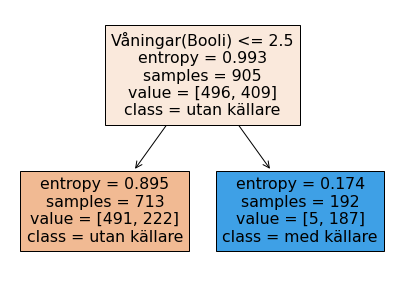

In [13]:
# Visualizing the trees
fig=plt.figure(figsize=(7,5))
plot_tree(DTM1, feature_names=X_train.columns, class_names=['utan källare', 'med källare'], filled=True)
fig.savefig('DTM1.jpg')

# Förklaring
entropi är måttet för blandning, oordning eller sortering. Om värdet är '0' så är det sorterat och allt som finns i mängden är av samma sort. Om värdet är '1' så är det maximalt blandat och det finns lika mycket av varje sort.

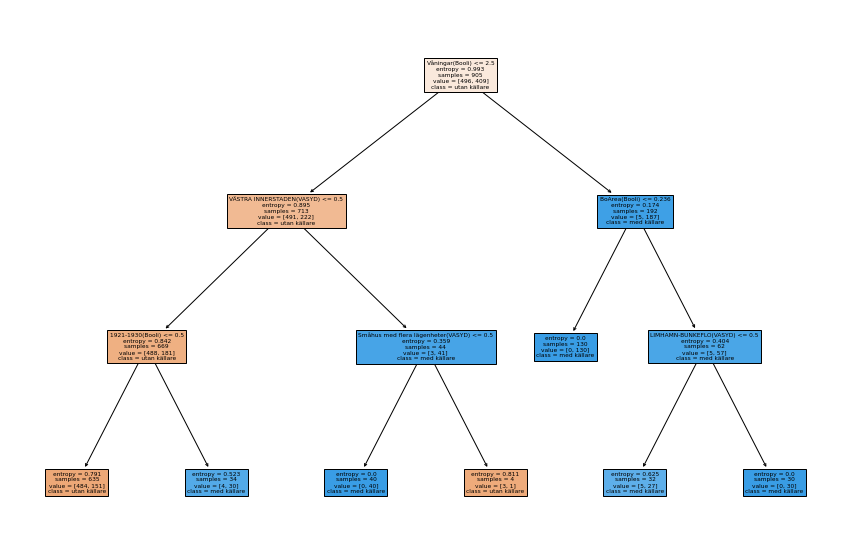

In [14]:
#Tree with 3 levels.

fig=plt.figure(figsize=(15,10))
plot_tree(DTM3, feature_names=X_train.columns, class_names=['utan källare', 'med källare'], filled=True)
fig.savefig('DTM3.jpg')

# GridSearch för en Support Vector Klassificeringsmodell

- SVK är den vanligaste icke-neurala nätverkmodell
- genom en ickelinjär kärna kan modellen också användas för icke-linjära problem
- bästa val av hyperpamatern kan hittas genom en lokal optimering genom att testa alla kombinationer av parametern utifrån en lista av värden för varje parameter.

In [15]:
start=datetime.now()

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1,10]}
svc = svm.SVC(probability=True)

gs = GridSearchCV(svc, parameters, verbose=3, scoring='accuracy').fit(X_train, y_train)
print('Computer calculation time (hrs:min:sec): ', datetime.now()-start)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.862 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.829 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.851 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.845 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.873 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.807 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.790 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.851 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.591 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly

In [18]:
print ("Best model found: ", gs.best_estimator_)

Best model found:  SVC(C=10, gamma=0.1, probability=True)


In [19]:
print('Final training score is: ', gs.score(X_train, y_train))
print('Best values for parameters are: ', gs.best_params_)

# Calculating all of the testing scores
y_pred_acc_train=gs.predict(X_train)
print('\t Accuracy: ', accuracy_score(y_train,y_pred_acc_train))
print('\t Precision: ', precision_score(y_train,y_pred_acc_train))
print('\t Recall: ', recall_score(y_train,y_pred_acc_train))
print('\t F1-score: ', f1_score(y_train,y_pred_acc_train))

Final training score is:  0.9160220994475138
Best values for parameters are:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
	 Accuracy:  0.9160220994475138
	 Precision:  0.9215189873417722
	 Recall:  0.8899755501222494
	 F1-score:  0.9054726368159204


In [20]:
print('Final testing score is: ', gs.score(X_test, y_test))
print('Best values for parameters are: ', gs.best_params_)

# Calculating all of the testing scores
y_pred_acc=gs.predict(X_test)
print('\t Accuracy: ', accuracy_score(y_test,y_pred_acc))
print('\t Precision: ', precision_score(y_test,y_pred_acc))
print('\t Recall: ', recall_score(y_test,y_pred_acc))
print('\t F1-score: ', f1_score(y_test,y_pred_acc))

Final testing score is:  0.8898678414096917
Best values for parameters are:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
	 Accuracy:  0.8898678414096917
	 Precision:  0.9083333333333333
	 Recall:  0.8861788617886179
	 F1-score:  0.897119341563786


In [21]:
# Defining the best-model classifier by selecting the best estimator. 
clf=gs.best_estimator_

<function matplotlib.pyplot.show(close=None, block=None)>

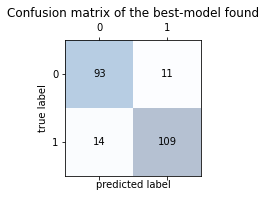

In [22]:
# Looking at clf's confusion matrix
y_pred_clf=clf.predict(X_test)
# build the confusion matrix
confmat= confusion_matrix(y_test,y_pred_clf)
titel='Confusion matrix of the best-model found'
# plotting a nicer figure of the confusion matrix
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i,j],
               va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.title(titel)
plt.show

# Manuel testing with new data

In [24]:
new_testfile = pd.read_csv(r"C:\Users\emma_\Downloads\Testdata_20.csv", delimiter=';')

In [25]:
new_testfile

,Villa(Booli),Lägenhet(Booli),Radhus(Booli),Tomt/Mark(Booli),Kedjehus(Booli),Parhus(Booli),Fritidshus(Booli),BoArea(Booli),TomArea(Booli),Våningar(Booli),...,1921-1930(Booli),1931-1940(Booli),1941-1950(Booli),1951-1960(Booli),1961-1970(Booli),1971-1980(Booli),1981-1990(Booli),1991-2000(Booli),2001-2010(Booli),2011-2022(Booli)
0,1,0,0,0,0,0,0,0.392273,0.453769,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0.248143,0.000000,3,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0.650817,0.502010,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0.472511,0.520100,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0.380386,0.274874,0,...,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0.276374,0.449246,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0.168499,0.000000,1,...,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0.154532,0.000000,3,...,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0.148588,0.000000,4,...,0,1,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0.523031,0.605025,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:

clf.predict(new_testfile)


C:\Users\emma_\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  Flerfamiljshus(VASYD)
-  Ospecificerad(VASYD)
-  Småhus friliggande(VASYD)
-  Småhus kedjehus(VASYD)
-  Småhus med flera lägenheter(VASYD)
- ...
Feature names seen at fit time, yet now missing:
- 1900-1910(Booli)
- Flerfamiljshus(VASYD)
- Ospecificerad(VASYD)
- Småhus friliggande(VASYD)
- Småhus kedjehus(VASYD)
- ...

  warnings.warn(message, FutureWarning)


array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [27]:
clf.predict_proba(new_testfile)

C:\Users\emma_\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  Flerfamiljshus(VASYD)
-  Ospecificerad(VASYD)
-  Småhus friliggande(VASYD)
-  Småhus kedjehus(VASYD)
-  Småhus med flera lägenheter(VASYD)
- ...
Feature names seen at fit time, yet now missing:
- 1900-1910(Booli)
- Flerfamiljshus(VASYD)
- Ospecificerad(VASYD)
- Småhus friliggande(VASYD)
- Småhus kedjehus(VASYD)
- ...

  warnings.warn(message, FutureWarning)


array([[0.03687666, 0.96312334],
       [0.18467272, 0.81532728],
       [0.58101783, 0.41898217],
       [0.86316907, 0.13683093],
       [0.87461104, 0.12538896],
       [0.98779276, 0.01220724],
       [0.14944607, 0.85055393],
       [0.1844436 , 0.8155564 ],
       [0.02468405, 0.97531595],
       [0.23295198, 0.76704802],
       [0.44889589, 0.55110411],
       [0.98463115, 0.01536885],
       [0.53374038, 0.46625962],
       [0.45718636, 0.54281364],
       [0.92093201, 0.07906799],
       [0.91840108, 0.08159892],
       [0.98524148, 0.01475852],
       [0.86720258, 0.13279742],
       [0.6310335 , 0.3689665 ],
       [0.46033299, 0.53966701]])